### 1. Objective

In this notebook, we use SHAP to interpret the predictions of our credit scoring model. We aim to understand which features contribute most to the risk of default, both globally and at the individual level.


In [1]:
import shap
import joblib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
shap.initjs()


### 2. Load Model and Data

We load the best-performing model (Logistic Regression), the preprocessed test data, and the fitted preprocessor.


In [3]:
# Load model and data
model = joblib.load("../models/logreg.pkl")  # si el vas guardar, si no pots fer servir logreg directament
preprocessor = joblib.load("../models/preprocessor.pkl")
X_test = joblib.load("../models/X_test.pkl")  # original, sense transformar

# Transform again to match the model input
X_test_processed = preprocessor.transform(X_test)


### 3. Fit SHAP Explainer

We use a `LinearExplainer` for Logistic Regression. For tree-based models, we would use `TreeExplainer`.


In [4]:
# Create SHAP explainer
explainer = shap.LinearExplainer(model, X_test_processed, feature_perturbation="interventional")

# Get SHAP values
shap_values = explainer.shap_values(X_test_processed)


c:\Users\cmarc\OneDrive\Escritorio\credit-scoring-german\venv\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


### 4. Global Feature Importance

We plot a summary of SHAP values across all features and test samples. This shows which variables have the most impact on the model output.


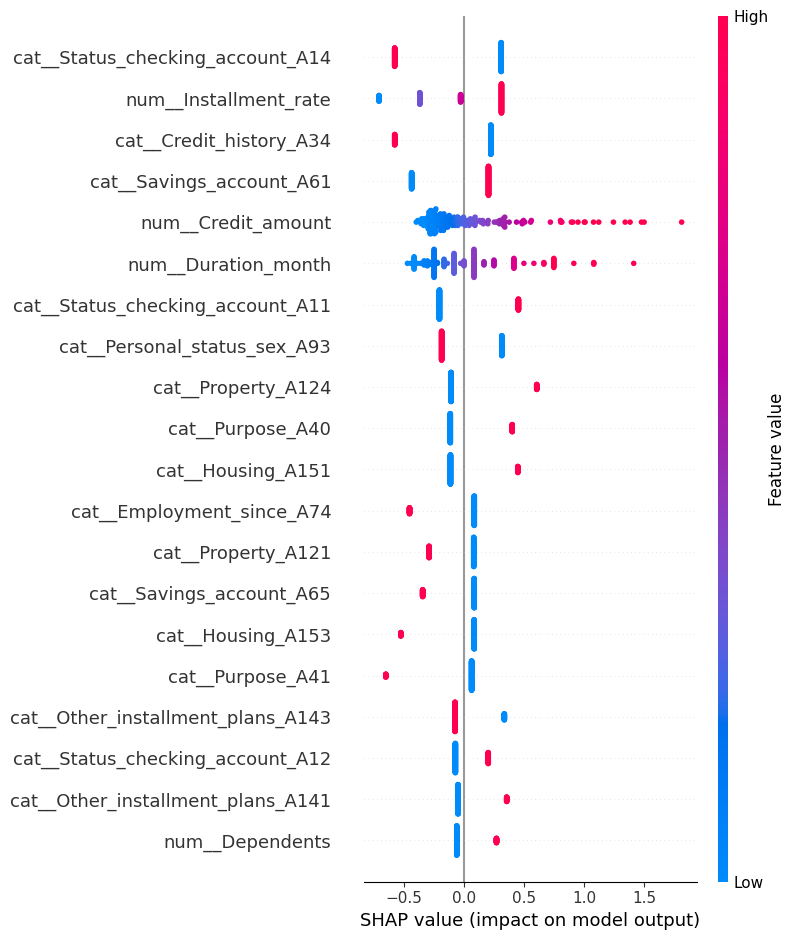

In [5]:
# Get feature names from preprocessor
feature_names = preprocessor.get_feature_names_out()

# Convert SHAP values to DataFrame
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)


This summary plot shows the 20 most important features in terms of their SHAP value impact on model predictions.

- Each point represents an individual prediction.
- The X-axis shows the SHAP value: the contribution of that feature to increasing or decreasing the predicted probability of default.
- Red points indicate high feature values, while blue indicates low values.

#### Key insights:
- **Credit_amount** and **Duration_month** are strong predictors of credit risk: higher amounts and longer durations increase predicted risk.
- **Status_checking_account_A14** has a strong positive impact on default probability, suggesting that customers with no checking account or poor status are high-risk.
- Other important categorical features include credit history and savings account status.
- Features with SHAP values close to 0 have little influence on the model’s decision.

This plot provides a global explanation of how the model uses each feature across all predictions.


### 5. SHAP Dependence Plot

We analyze how specific features influence the predicted risk. This is useful for identifying non-linear relationships or interaction effects.


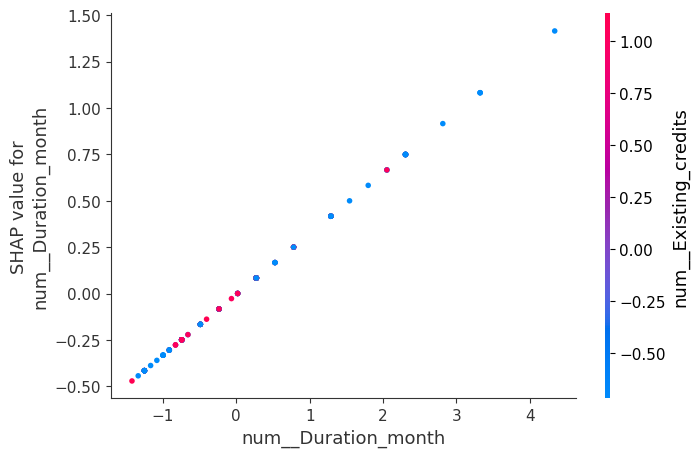

In [8]:
# Example: effect of credit duration
shap.dependence_plot("num__Duration_month", shap_values, X_test_processed, feature_names=feature_names)


### 6. Local Explanations (Force Plot)

We examine SHAP explanations for individual predictions. This helps understand why a specific customer is predicted to be high or low risk.


In [12]:
# Select one sample
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], X_test_processed[i], feature_names=feature_names)


### 7. Conclusions

SHAP provides transparency into our credit scoring model. We can identify the most influential features (e.g., credit duration, amount, age), and justify decisions at the individual level — a key requirement for compliance and trust in financial models.
